# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [7]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [10]:
data.sample(5)

Rank Release_Date                                        Movie_Title  \
2633  2395    3/24/2006                                         Stay Alive   
2216  2704    4/30/2004                      Bobby Jones: Stroke of Genius   
1731   308   12/19/2001  The Lord of the Rings: The Fellowship of the Ring   
2658  2383    4/28/2006                                           Stick It   
4038   227   11/18/2011           The Twilight Saga: Breaking Dawn, Part 1   

     USD_Production_Budget USD_Worldwide_Gross USD_Domestic_Gross  
2633           $20,000,000         $23,187,506        $23,086,480  
2216           $17,000,000          $2,694,071         $2,694,071  
1731          $109,000,000        $887,210,985       $315,544,750  
2658           $20,000,000         $30,399,714        $26,910,736  
4038          $127,500,000        $689,420,051       $281,287,133

In [11]:
data.head()

Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [13]:
data.isna().values.any()

False

In [14]:
data.duplicated().values.any()

False

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [17]:
columns_convert = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for column in columns_convert:
    data[column] = data[column].astype(str).str.replace('$', '')
    data[column] = data[column].astype(str).str.replace(',','')
    data[column] = pd.to_numeric(data[column])
data.head()
data.USD_Production_Budget[3]


100000

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [19]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [23]:
data.USD_Production_Budget.describe()

count         5,391.00
mean     31,113,737.58
std      40,523,796.88
min           1,100.00
25%       5,000,000.00
50%      17,000,000.00
75%      40,000,000.00
max     425,000,000.00
Name: USD_Production_Budget, dtype: float64

In [24]:
data[data.USD_Production_Budget == 1100]

Rank Release_Date        Movie_Title  USD_Production_Budget  \
2427  5391   2005-05-08  My Date With Drew                   1100   

      USD_Worldwide_Gross  USD_Domestic_Gross  
2427               181041              181041

In [25]:
data.USD_Worldwide_Gross.describe()

count           5,391.00
mean       88,855,421.96
std       168,457,757.00
min                 0.00
25%         3,865,206.00
50%        27,450,453.00
75%        96,454,455.00
max     2,783,918,982.00
Name: USD_Worldwide_Gross, dtype: float64

In [26]:
data[data.USD_Worldwide_Gross == 2783918982]

Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar              425000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
3529           2783918982           760507625

In [27]:
group = data[['USD_Production_Budget', 'USD_Worldwide_Gross']]
group_table = group.groupby(by=['USD_Production_Budget'])
group_table.min()

USD_Worldwide_Gross
USD_Production_Budget                     
1100                                181041
1400                                     0
5000                                     0
6000                                240495
7000                                   900
...                                    ...
260000000                        586581936
275000000                        260002115
300000000                        879620923
306000000                       2058662225
425000000                       2783918982

[484 rows x 1 columns]

# Investigating the Zero Revenue Films

In [29]:
data.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [31]:
dom_0 = data[data.USD_Domestic_Gross == 0]
dom_0['USD_Domestic_Gross'].value_counts()

USD_Domestic_Gross
0    512
Name: count, dtype: int64

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [33]:
ww_0 = data[data.USD_Worldwide_Gross == 0]
ww_prod = ww_0.sort_values('USD_Production_Budget', ascending=False)
len(ww_0)

357

### Filtering on Multiple Conditions

In [35]:
int_releas = data.loc[(data.USD_Worldwide_Gross > 0) & (data.USD_Domestic_Gross == 0 )]
len(int_releas)

155

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [37]:
mult_data = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')
mult_data

Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0  
...                   ...                 ...  
5340              1480089                   0  
5348             58807172                   0  
5360                27561                   0  
5372             48048527                   0  
5374                36630                   0  

[155 rows x 6 columns]

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [39]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [40]:
data_time_collection = data[data.Release_Date > scrape_date]
data_time_collection

Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000                    0                   0

In [41]:
data_clean = data.drop(data_time_collection.index)
data_clean

Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
1     5140   1916-05-09                       Intolerance   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
...    ...          ...                               ...   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
0                    110000             11000000            10000000  
1                    385907                    0                   0  
2                    200000              8000000             8000000  
3                    100000              3000000             3000000  
4                    245000             22000000            11000000  
...                     ...                  ...                 ...  
5379               40000000            166893990            92029184  
5380              185000000            561137727           168052812  
5381              175000000            140012608            39175066  
5382               42000000             57850343            45850343  
5383               20000000                    0                   0  

[5384 rows x 6 columns]

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [43]:
lost_money = data_clean.loc[(data_clean.USD_Production_Budget	> data_clean.USD_Worldwide_Gross)]
percent = len(lost_money)/len(data_clean)
print(percent * 100)

37.27711738484398


# Seaborn for Data Viz: Bubble Charts

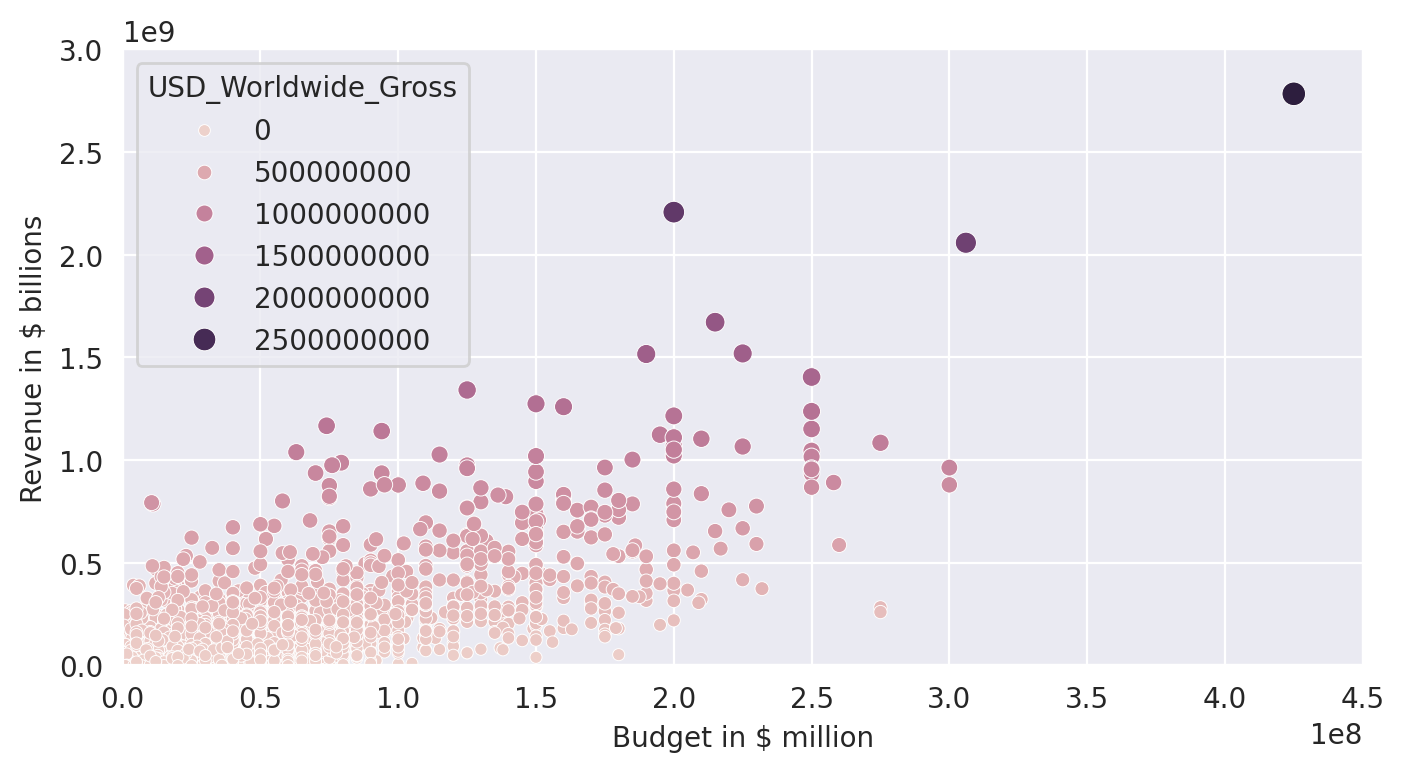

In [45]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')
ax.set(ylim = (0, 3000000000), xlim=(0, 450000000), ylabel='Revenue in $ billions', xlabel='Budget in $ million')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



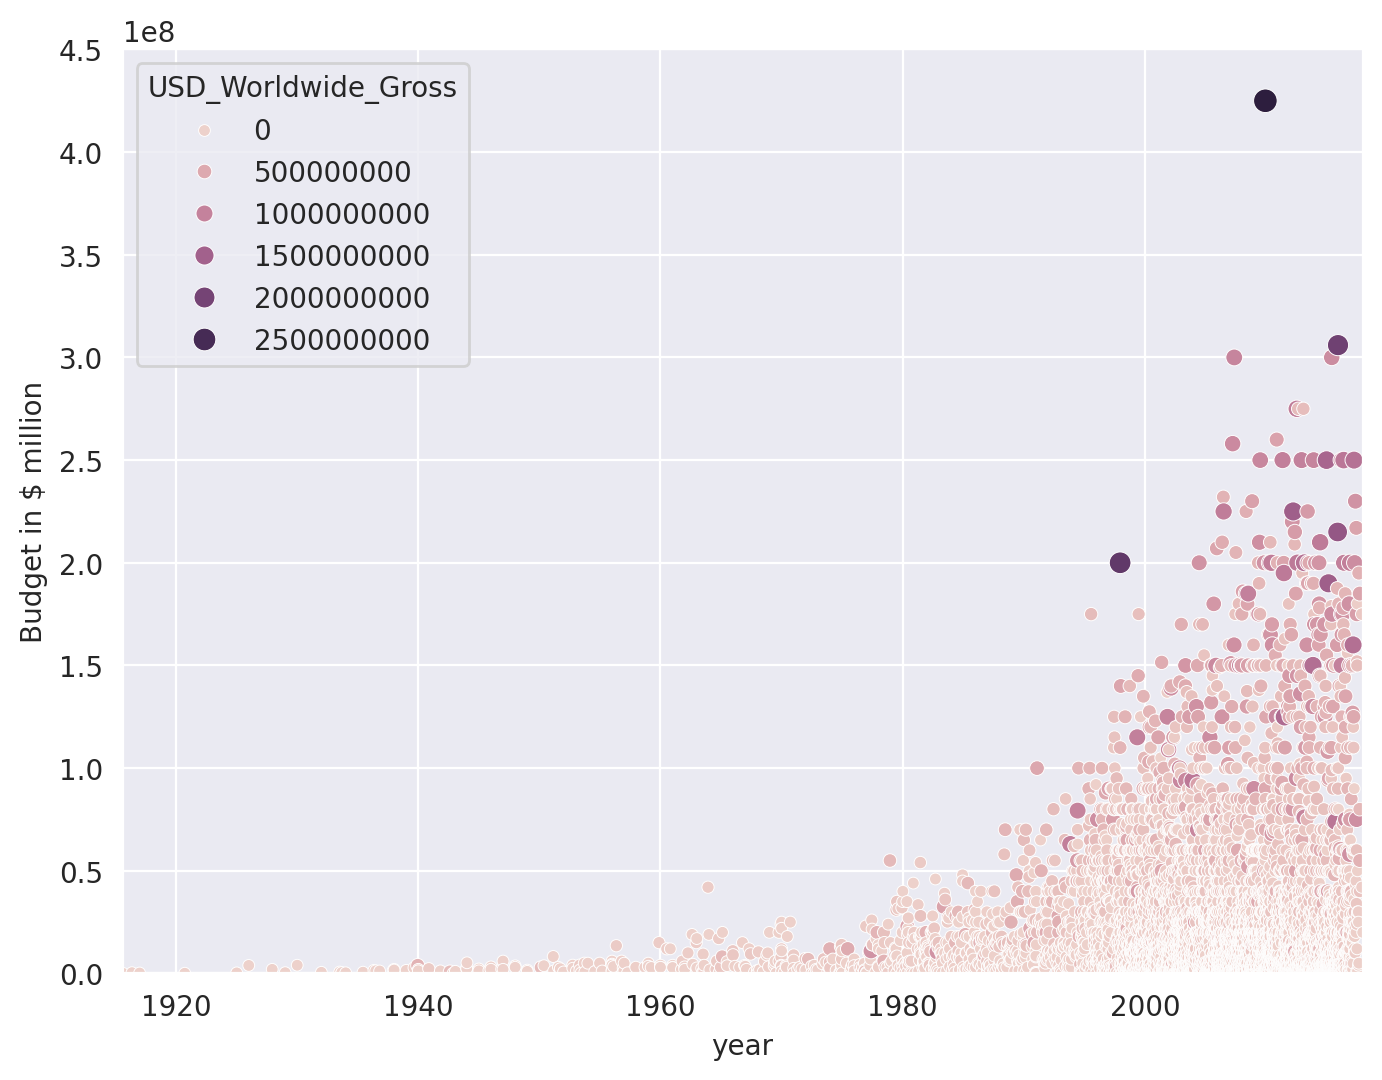

In [47]:
data_clean.resample('YE', on='Release_Date')
plt.figure(figsize=(8,6), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, y='USD_Production_Budget', x='Release_Date', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')
    ax.set(ylabel='Budget in $ million', xlabel='year',xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()), ylim=(0,450000000))
plt.show()


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [49]:
time_index = pd.DatetimeIndex(data=data_clean.Release_Date).year
time_index
data_clean['Decade'] = time_index//10*10
data_clean.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0             11000000            10000000    1910  
1                    0                   0    1910  
2              8000000             8000000    1910  
3              3000000             3000000    1920  
4             22000000            11000000    1920

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [51]:
old_movies = data_clean[data_clean.Decade < 1970]
old_movies.sample(5)
new_movies = data_clean[data_clean.Decade > 1970]
new_movies.sample(5)

Rank Release_Date                           Movie_Title  \
1473   593   2000-08-12                        Vertical Limit   
3037   594   2007-12-21                  Charlie Wilson's War   
2615  4387   2006-02-24                                Tsotsi   
4052   497   2011-12-16  Alvin and the Chipmunks: Chipwrecked   
719   3538   1994-04-29                                   PCU   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
1473               75000000            213500000            68473360    2000  
3037               75000000            119512771            66661095    2000  
2615                3000000             11537539             2912606    2000  
4052               80000000            349088523           133107389    2010  
719                 9000000              4333569             4333569    1990

In [52]:
old_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   153 non-null    int64         
 1   Release_Date           153 non-null    datetime64[ns]
 2   Movie_Title            153 non-null    object        
 3   USD_Production_Budget  153 non-null    int64         
 4   USD_Worldwide_Gross    153 non-null    int64         
 5   USD_Domestic_Gross     153 non-null    int64         
 6   Decade                 153 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 9.0+ KB


In [53]:
new_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5122 entries, 262 to 5383
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5122 non-null   int64         
 1   Release_Date           5122 non-null   datetime64[ns]
 2   Movie_Title            5122 non-null   object        
 3   USD_Production_Budget  5122 non-null   int64         
 4   USD_Worldwide_Gross    5122 non-null   int64         
 5   USD_Domestic_Gross     5122 non-null   int64         
 6   Decade                 5122 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 300.1+ KB


In [54]:
old_movies.sort_values('USD_Production_Budget', ascending=False)

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
109  1253   1963-12-06                       Cleopatra               42000000   
150  2175   1969-12-16                    Hello, Dolly               24000000   
143  2465   1969-01-01                   Sweet Charity               20000000   
118  2425   1965-02-15    The Greatest Story Ever Told               20000000   
148  2375   1969-10-15                Paint Your Wagon               20000000   
..    ...          ...                             ...                    ...   
147  5228   1969-07-25                The Stewardesses                 200000   
29   5283   1942-11-16                      Cat People                 134000   
135  5292   1968-01-10        Night of the Living Dead                 114000   
0    5293   1915-08-02           The Birth of a Nation                 110000   
3    5299   1920-09-17  Over the Hill to the Poorhouse                 100000   

     USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
109             71000000            57000000    1960  
150             33208099            33208099    1960  
143              8000000             8000000    1960  
118             15473333            15473333    1960  
148             31678778            31678778    1960  
..                   ...                 ...     ...  
147             25000000            13500000    1960  
29               8000000             4000000    1940  
135             30000000            12000000    1960  
0               11000000            10000000    1910  
3                3000000             3000000    1920  

[153 rows x 7 columns]

# Seaborn Regression Plots

In [56]:
plt.figure(figsize=(8,4), dpi=2000)
with sns.axes_style('whitegrid'):
    ax=sns.regplot(data=old_movies, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws={'alpha': 0.4}, line_kws={'color':'black'})
plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

In [58]:
new_movies.sort_values('USD_Worldwide_Gross', ascending=False)

Rank Release_Date                           Movie_Title  \
3529     1   2009-12-18                                Avatar   
1034    37   1997-12-19                               Titanic   
5079     2   2015-12-18  Star Wars Ep. VII: The Force Awakens   
5077    28   2015-12-06                        Jurassic World   
4131    22   2012-04-05                          The Avengers   
...    ...          ...                                   ...   
4987  4992   2015-09-01                                Vessel   
4986  4083   2015-09-01                Let's Kill Ward's Wife   
2563  3898   2005-12-08                                 11:14   
2580  5091   2005-12-31                       Insomnia Manica   
5383  2521   2017-12-31                    The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
3529              425000000           2783918982           760507625    2000  
1034              200000000           2207615668           658672302    1990  
5079              306000000           2058662225           936662225    2010  
5077              215000000           1671640593           652198010    2010  
4131              225000000           1519479547           623279547    2010  
...                     ...                  ...                 ...     ...  
4987                 800000                    0                   0    2010  
4986                5000000                    0                   0    2010  
2563                6000000                    0                   0    2000  
2580                 500000                    0                   0    2000  
5383               20000000                    0                   0    2010  

[5122 rows x 7 columns]

In [59]:
plt.figure(figsize = (8,4), dpi=2000)
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_movies, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws={'alpha':0.4}, color='#2f4b7c', line_kws={'color': '#ff7c43'})
ax.set(ylim=(0,2800000000), xlim=(0,450000000), ylabel='Revenue in Billions $', xlabel='Production in Millions $')
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [105]:
regression = LinearRegression()
x = pd.DataFrame(new_movies, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_movies, columns=['USD_Worldwide_Gross'])
regression.fit(x,y)

array([-10278584.79397987])

In [107]:
regression.intercept_

array([-10278584.79397987])

In [109]:
regression.coef_

array([[3.13834648]])

In [111]:
regression.score(x,y)

0.564250171393927

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [117]:
old_movies.sample(4)

Rank Release_Date           Movie_Title  USD_Production_Budget  \
48  3593   1951-02-23            Quo Vadis?                8250000   
38  4545   1946-01-01             Notorious                2000000   
71  4310   1956-02-16              Carousel                3380000   
98  2546   1962-08-11  Mutiny on The Bounty               19000000   

    USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
48             30022000            30000000    1950  
38             24464742            24464742    1940  
71                 3220                   0    1950  
98             13680000            13680000    1960

In [135]:
old_movie_reg = LinearRegression()
x = pd.DataFrame(old_movies, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_movies, columns=['USD_Worldwide_Gross'])
old_movie_reg.fit(x,y)
intercept = old_movie_reg.intercept_
coef =old_movie_reg.coef_
old_movie_reg.score(x,y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [149]:
budget = 350000000
estimate = intercept[0] + coef[0,0] * budget
#estimate = round(estimate, -6)
print(estimate)

599521139.0388365
